In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mmsno
from collections import Counter 

In [4]:
#Sample dataset is the global life expectancy & spend data of various countries from 1970 to 2020.
df=sns.load_dataset('healthexp')
df.head(6)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
5,1971,Canada,313.391,72.8


In [7]:
df.tail(5)

,Year,Country,Spending_USD,Life_Expectancy
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7
273,2020,USA,11859.179,77.0


In [6]:
#The dataset is a 274 by 4 matrix in shape.
df.shape

(274, 4)

The shape of the dataset is a 274 by 4 matrix. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [11]:
df.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


In [3]:
#Investigate for missing data.
null_vals=df.isnull().sum()
null_vals

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

There were no missing data in the dataset. 

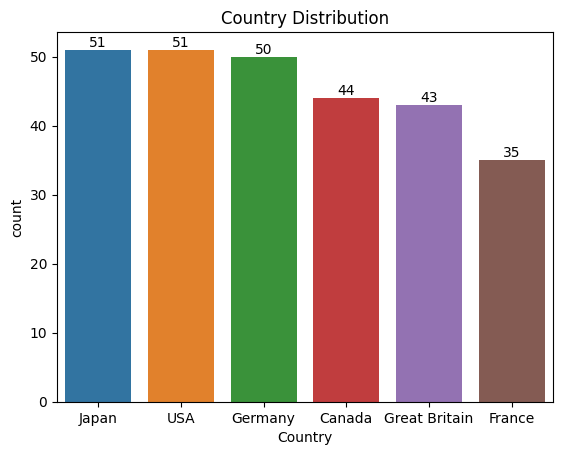

In [28]:
#Country distribution
ax=sns.countplot(x=df['Country'], order=df['Country'].value_counts(ascending=False).index)
values=df['Country'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Country Distribution");

The Viz above shows country distribution by count with the US & Japan having the highest transaction count of 51 while France has the least at 35.

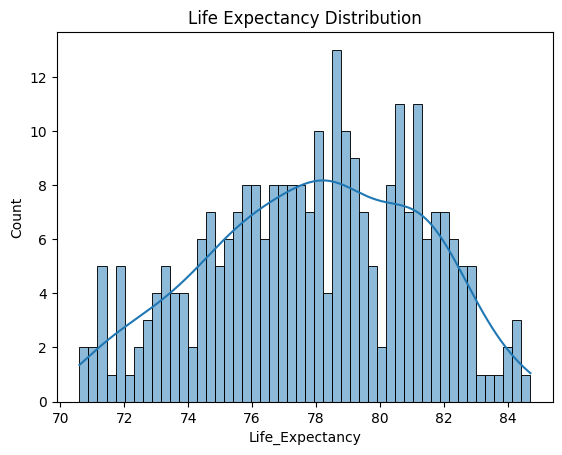

In [73]:
#distribution plot for Life expectancy
sns.histplot(df['Life_Expectancy'], kde=True, bins=50);
plt.title("Life Expectancy Distribution");

The highest life expectancy as shown by the histogram distribution above was 79 years followed by 81 years while the least recorded was 83 years. 

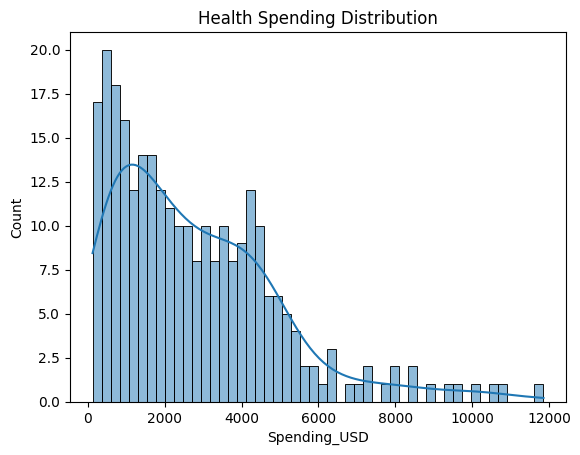

In [74]:
#distribution plot for health spending
sns.histplot(df['Spending_USD'], kde=True, bins=50);
plt.title("Health Spending Distribution");

Health spending distribution ranged btw USD1,000 to USD6,000. However, the highest count of spend was USD1,000 while the least was USD6,000. There were outliers from USD7,000 to USD12,000

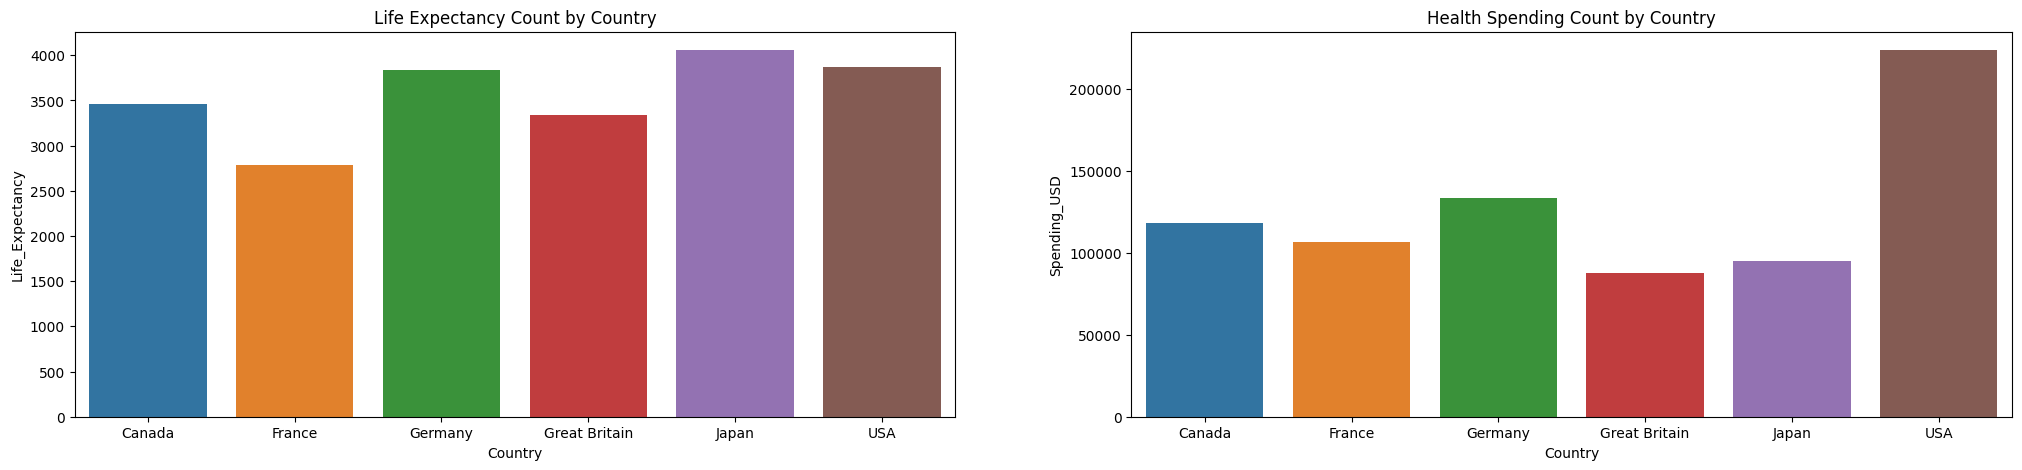

In [87]:
# Life expectancy & Spending Counts by Country
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(25,5))
aa=df.groupby('Country')['Life_Expectancy'].sum().reset_index()
sns.barplot(x='Country', data=aa, y='Life_Expectancy', ax=axs[0])
axs[0].set_title("Life Expectancy Count by Country")

ab=df.groupby('Country')['Spending_USD'].sum().reset_index()
sns.barplot(x='Country', data=ab, y='Spending_USD', ax=axs[1])
axs[1].set_title("Health Spending Count by Country");            

The Viz on the left shows life expectancy count by country with Japan at 4,000 closely followed by Germany and the US at 3,700 each while France had the least at slightly over 2,500. This indicates that more people in the the dataset from Japan experienced more life expectancy than any other country. On the other hand, the viz on the right depicts health spending count by country with the US clearly outspending other countries while Great Britain was the least. 

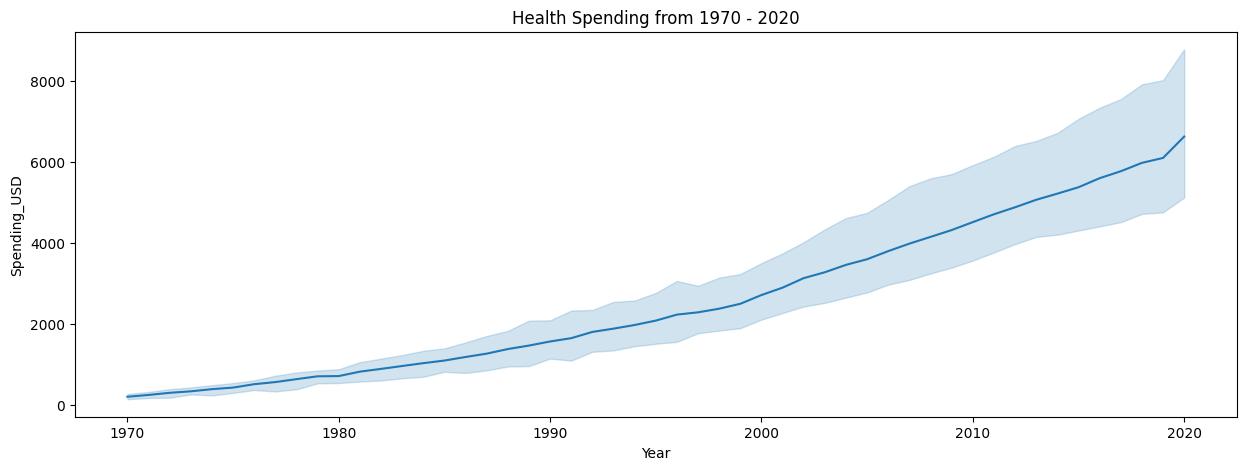

In [59]:
#Trend Analysis - Health Spending
plt.figure(figsize=(15,5))
sns.lineplot(x='Year', y='Spending_USD', data=df)
plt.title("Health Spending from 1970 - 2020");

The viz above depicts a trend analysis of health spending for all the countries from 1970 to 2020. Clearly, as the years progressed spending increased accordingly. 

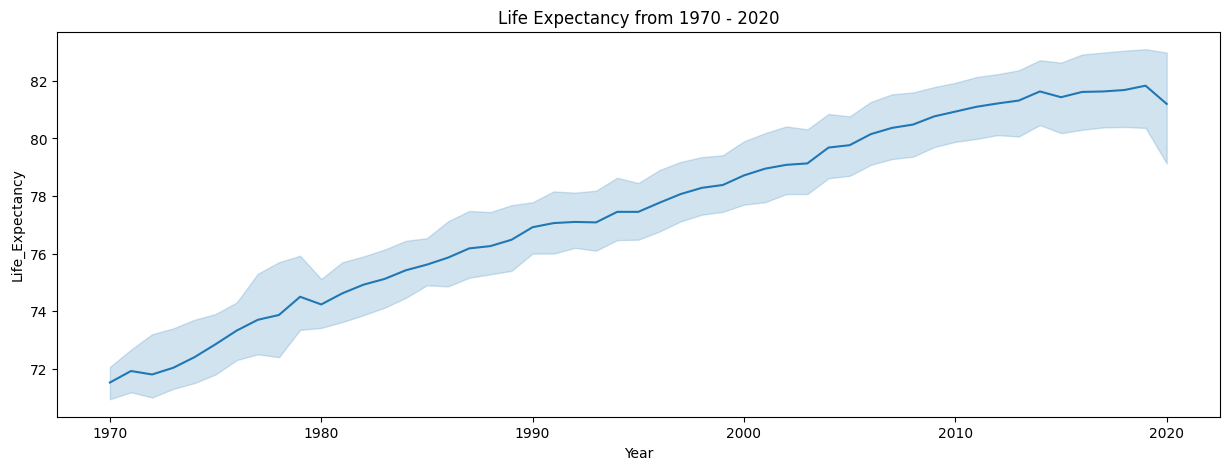

In [62]:
#Trend Analysis - Life Expectancy
plt.figure(figsize=(15,5))
sns.lineplot(x='Year', y='Life_Expectancy', data=df)
plt.title("Life Expectancy from 1970 - 2020");

The chart above is the life expectancy of all countries in the dataset from 1970 to 2020. Both are directly proportional because as the years progressed, life expectancy increased accordingly. Note the slight decline in 2020, this could be as a result of deaths from Covid-19. The global Corona virus pandemic was first recorded in fall/winter (December) 2019. 

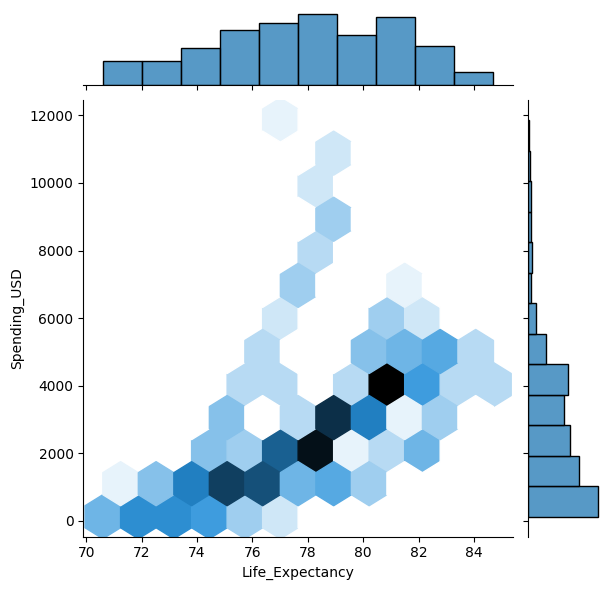

In [94]:
#Jointplot to visualize the relationship between life expectancy and health spending
sns.jointplot(x='Life_Expectancy', y='Spending_USD', data=df, kind='hex');

The Joint plot above shows a normal distribution for life expectancy and a left skew with outliers on the left for health spend(USD) per annum for all countries. In summary, maximum life expectancy is betwwen 75 & 81 years while health spend is betwwen USD1,000 to USD6,000 with outliers ranging from USD7,000 to USD12,000

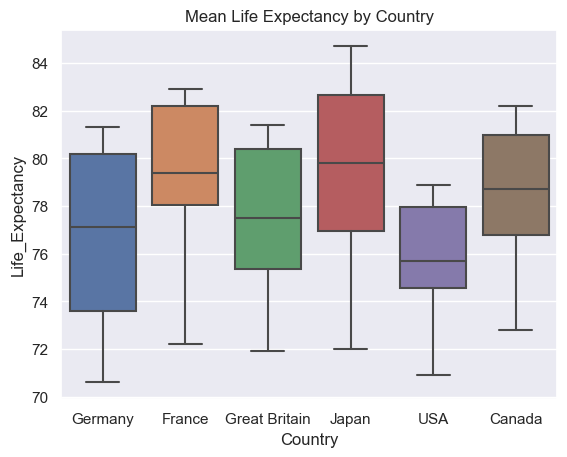

In [105]:
#Visualizing mean life expectancy by country as well as Upper & Lower Life expectancy ranges. 
sns.boxplot(x='Country', y='Life_Expectancy', data=df)
plt.title("Mean Life Expectancy by Country");

The viz above depicts life expectancy data for all countries. Specifically, the mean life expectancy per country with Japan having the highest mean life expectancy at 79 years while suprisingly the US had the least at 75 years. 

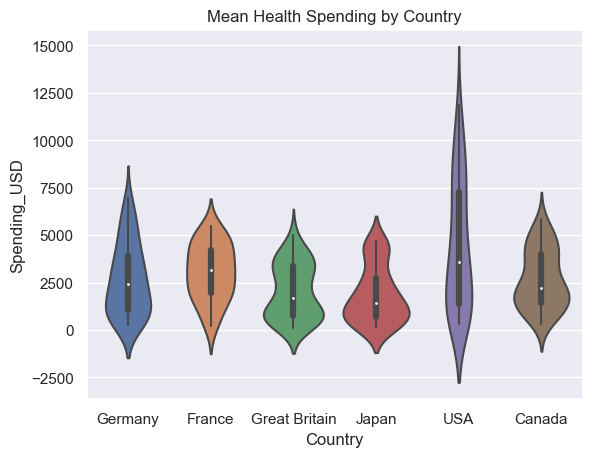

In [110]:
#Visualizing mean Health Spend by country as well as Upper & Lower Health Spend ranges. 
sns.violinplot(x='Country', y='Spending_USD', data=df)
plt.title("Mean Health Spending by Country");

The mean health spending per country per annum is shown above with the US outspending the others with a mean spend of about USD3,000 followed by France at USD2,700, Germany at USD2,500. Great Britain, Japan and Canadan all had a mean health spend below USD2,500 with Japan recording the least at USD1,250.

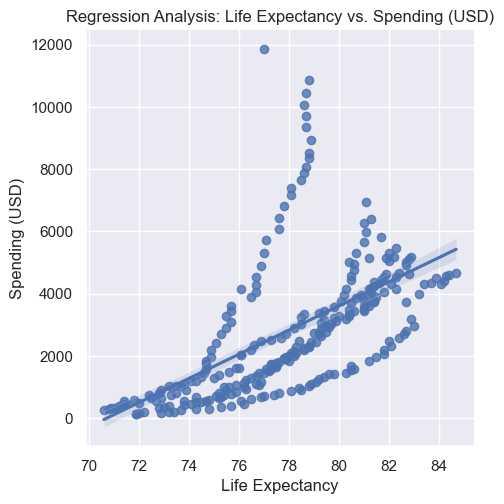

In [125]:
#Visualize Regression Analysis: Relationship between Life Expectancy & Health Spending(USD)
sns.lmplot(x='Life_Expectancy', y='Spending_USD', data=df)
plt.title('Regression Analysis: Life Expectancy vs. Spending (USD)')
plt.xlabel('Life Expectancy')
plt.ylabel('Spending (USD)')
plt.show();

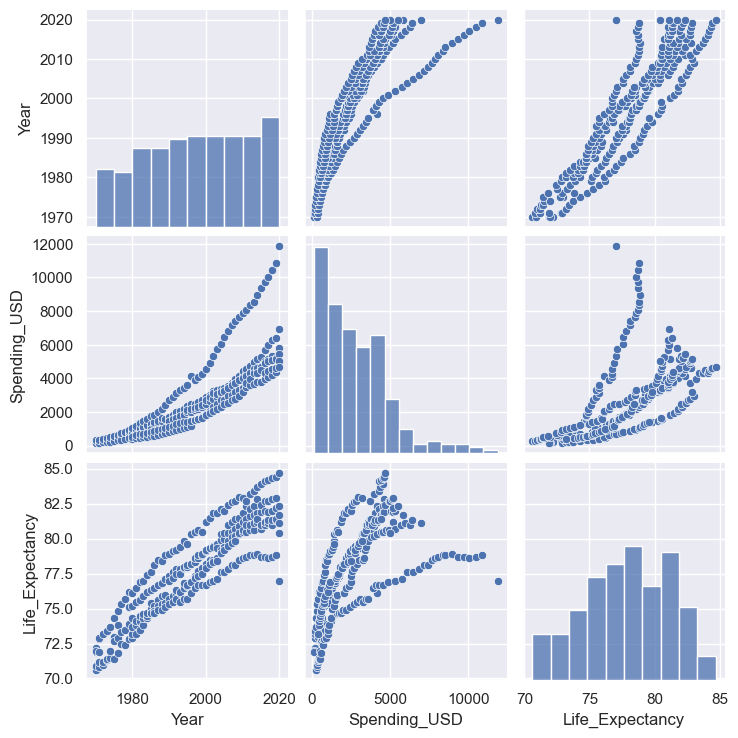

In [124]:
#Pairplot to visualize columns with numerical data - Life expectancy and health spending 
sns.pairplot(df, height=2.5)
plt.show();

The viz above examines the relationship between life expectancy and health spend. Both are directly proportional, as life expectancy increases health spend increases and vice-versa. 

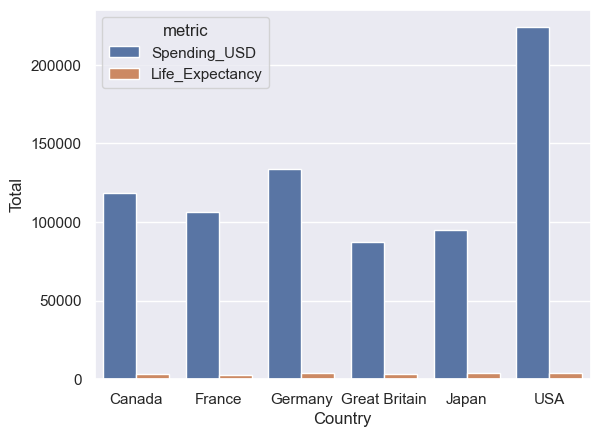

In [128]:
#Visualizing multivariate analysis : Relationship between Country and both Health Spending(USD) & Life_Expectancy
bb=df.groupby('Country') [['Spending_USD', 'Life_Expectancy']].sum().reset_index()
bb=pd.melt(bb, id_vars='Country', var_name='metric', value_name='Total')
sns.barplot(data=bb, x='Country', y='Total', hue='metric');

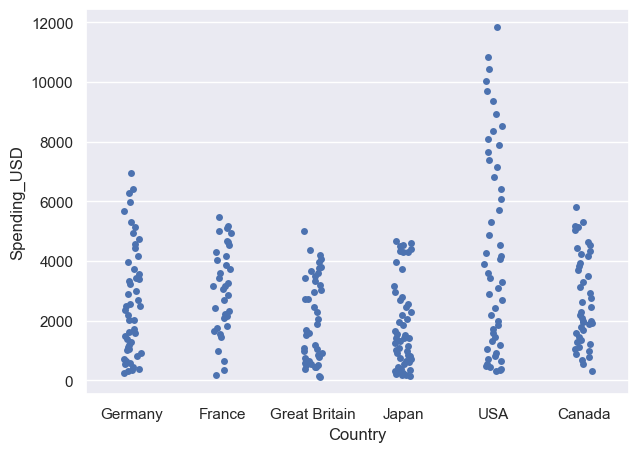

In [139]:
#Visualize Multivariate Avalysis for Countries and Health Spend(USD)
plt.figure(figsize=(7,5))
sns.stripplot(x='Country', y='Spending_USD', data=df);

In the above chart, the US clearly outspent the other countries in terms of health spend in USD per annum with USD12,000 recorded as highest spend. This amount is also considered an outlier in the dataset with average spend range betwwen USD1,000 to USD6,000 per annum. 

In [ ]:
The Viz above examines in further details health spend (USD) per country. 

                     Year  Spending_USD  Life_Expectancy
Year             1.000000      0.826273         0.902175
Spending_USD     0.826273      1.000000         0.579430
Life_Expectancy  0.902175      0.579430         1.000000


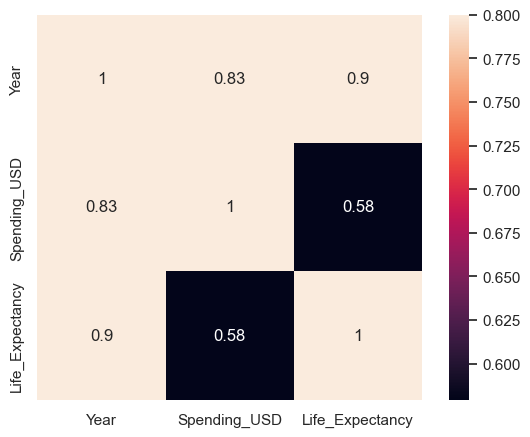

In [148]:
#Calculating & visualising correlation of the dataset
#Calculating correlation
numeric_df=df.select_dtypes(include='number')
a=numeric_df.corr()
print(a)

#Visualizing correlation of the dataset using a heatmap
ax=plt.subplots(figsize=(7,5))
sns.heatmap(a, vmax=.8, square=True, annot=True);


The above heatmap describes the correlation between the life expectancy and health spend(USD) columns in the dataset. With a strong positive correlation of 0.58, this clearly shows both variables are linearly related. That is, the two variables move in the same direction, which re-confirms my analysis in the previous vizes that both variables are directly proportional to each other. 